In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from keras.datasets import mnist
data = mnist
(trainImg, trainLabel),(testImg,testLabel) = data.load_data()

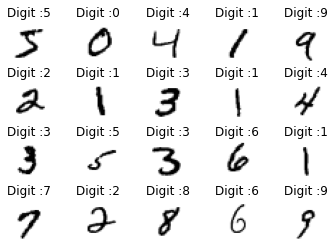

In [3]:
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(trainImg[i],cmap='gray_r')
    plt.title("Digit :{}".format(trainLabel[i]))
    plt.subplots_adjust(hspace=0.5)
    plt.axis('off')

In [4]:
trainImg=trainImg/255.0 #Normalizing the pixel values between 0 and 1
testImg=testImg/255.0

print('Training images shape :', trainImg.shape)
print('Testing images shape :', testImg.shape)

Training images shape : (60000, 28, 28)
Testing images shape : (10000, 28, 28)


In [5]:
valImg = trainImg[-6000:]
valLabel = trainLabel[-6000:]

trainImg = trainImg[:-6000]
trainLabel = trainLabel[:-6000]

print('Training images shape :', trainImg.shape)
print('Testing images shape :', testImg.shape)
print('Validation images shape :', valImg.shape)

Training images shape : (54000, 28, 28)
Testing images shape : (10000, 28, 28)
Validation images shape : (6000, 28, 28)


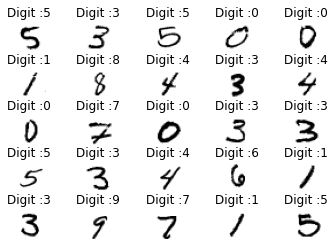

In [6]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(valImg[i],cmap='gray_r')
    plt.title("Digit :{}".format(valLabel[i]))
    plt.subplots_adjust(hspace=0.5)
    plt.axis('off')

In [7]:
from keras.models import Sequential
from keras.layers import Flatten,Dense

model=Sequential()
inputLayer=Flatten(input_shape=(28,28)) #flatten will compress the input of 28x28
model.add(inputLayer)

hiddenLayer1=Dense(500,activation='relu') #dense connects neurons between the layers
model.add(hiddenLayer1)

hiddenLayer2=Dense(500,activation='relu')
model.add(hiddenLayer2)

hiddenLayer3=Dense(500,activation='relu')
model.add(hiddenLayer3)

hiddenLayer4=Dense(500,activation='relu')
model.add(hiddenLayer4)

outputLayer=Dense(10,activation='softmax') #softmax activation into probability values
model.add(outputLayer)

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
modelInfo = model.fit(trainImg,trainLabel, epochs=60, batch_size = 50000, validation_data=(valImg, valLabel))

Epoch 1/60
2/2 [==============================] - 2s 376ms/step - loss: 2.2934 - accuracy: 0.1646 - val_loss: 1.7976 - val_accuracy: 0.7285
Epoch 2/60
2/2 [==============================] - 1s 197ms/step - loss: 1.7973 - accuracy: 0.7033 - val_loss: 1.0417 - val_accuracy: 0.7878
Epoch 3/60
2/2 [==============================] - 1s 201ms/step - loss: 1.0808 - accuracy: 0.7575 - val_loss: 0.5411 - val_accuracy: 0.8428
Epoch 4/60
2/2 [==============================] - 1s 196ms/step - loss: 0.6283 - accuracy: 0.8082 - val_loss: 0.6142 - val_accuracy: 0.7750
Epoch 5/60
2/2 [==============================] - 1s 194ms/step - loss: 0.7129 - accuracy: 0.7548 - val_loss: 0.5672 - val_accuracy: 0.8023
Epoch 6/60
2/2 [==============================] - 1s 197ms/step - loss: 0.6721 - accuracy: 0.7809 - val_loss: 0.4321 - val_accuracy: 0.8673
Epoch 7/60
2/2 [==============================] - 1s 200ms/step - loss: 0.5172 - accuracy: 0.8407 - val_loss: 0.3196 - val_accuracy: 0.9095
Epoch 8/60
2/2 [====

2/2 [==============================] - 2s 237ms/step - loss: 0.0338 - accuracy: 0.9908 - val_loss: 0.0758 - val_accuracy: 0.9780
Epoch 60/60
2/2 [==============================] - 1s 191ms/step - loss: 0.0326 - accuracy: 0.9911 - val_loss: 0.0737 - val_accuracy: 0.9797


In [10]:
model.save('finalProject')
model.summary()

INFO:tensorflow:Assets written to: finalProject\assets
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 500)               250500    
                                                                 
 dense_4 (Dense)             (None, 10)                5010      
                                                                 
T

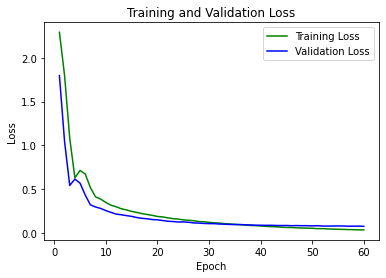

In [10]:
trainLoss = modelInfo.history['loss']
valLoss = modelInfo.history['val_loss']
epochs = range(1,61)
plt.plot(epochs, trainLoss, 'g', label = 'Training Loss')
plt.plot(epochs, valLoss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

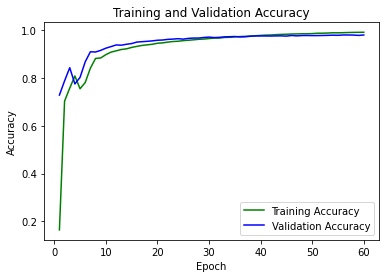

In [11]:
trainAcc = modelInfo.history['accuracy']
valAcc = modelInfo.history['val_accuracy']
epochs = range(1,61)
plt.plot(epochs, trainAcc, 'g', label = 'Training Accuracy')
plt.plot(epochs, valAcc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
lossAndAcc=model.evaluate(testImg,testLabel,verbose=2)
print("Test Loss", lossAndAcc[0])
print("Test Accuracy", lossAndAcc[1])

313/313 - 1s - loss: 0.0780 - accuracy: 0.9759 - 522ms/epoch - 2ms/step
Test Loss 0.07804073393344879
Test Accuracy 0.9758999943733215


In [13]:
incorrect = [0,0,0,0,0,0,0,0,0,0]
prediction=model.predict(testImg)
for i in range (0,10000):
    if(testLabel[i] != (np.argmax(prediction[i]))):
        if testLabel[i] == 0:
            incorrect[0] = incorrect[0] + 1
        elif testLabel[i] == 1:
            incorrect[1] = incorrect[1] + 1
        elif testLabel[i] == 2:
            incorrect[2] = incorrect[2] + 1
        elif testLabel[i] == 3:
            incorrect[3] = incorrect[3] + 1
        elif testLabel[i] == 4:
            incorrect[4] = incorrect[4] + 1
        elif testLabel[i] == 5:
            incorrect[5] = incorrect[5] + 1
        elif testLabel[i] == 6:
            incorrect[6] = incorrect[6] + 1
        elif testLabel[i] == 7:
            incorrect[7] = incorrect[7] + 1
        elif testLabel[i] == 8:
            incorrect[8] = incorrect[8] + 1
        elif testLabel[i] == 9:
            incorrect[9] = incorrect[9] + 1

        #plt.imshow(testImg[i],cmap='gray_r')
        #plt.title('Actual Value: {}'.format(testLabel[i]))
        #print('Unsuccessful prediction')
print("Digit | # Wrong")
for i in range (0,9):
    print("   ",i,"| ", incorrect[i])

Digit | # Wrong
    0 |  9
    1 |  10
    2 |  26
    3 |  27
    4 |  16
    5 |  28
    6 |  20
    7 |  29
    8 |  28
